In [1]:
import pandas as pd
df=pd.read_csv('nifty.csv')

In [2]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover ₹,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,NIFTYBEES,EQ,22-May-2023,199.82,200.49,200.93,199.05,200.70,200.74,200.52,"23,30,996","46,74,12,862.50","27,646","15,44,192",66.25
1,NIFTYBEES,EQ,23-May-2023,200.74,200.05,201.70,200.05,200.90,201.02,201.33,"26,12,792","52,60,32,927.63","20,817","19,24,894",73.67
2,NIFTYBEES,EQ,24-May-2023,201.02,201.49,201.50,199.81,200.49,200.24,200.71,"24,13,489","48,44,03,871.10","20,505","13,34,548",55.30
3,NIFTYBEES,EQ,25-May-2023,200.24,200.95,200.95,199.26,200.94,200.70,200.04,"28,91,537","57,84,36,766.15","23,699","18,75,895",64.88
4,NIFTYBEES,EQ,26-May-2023,200.70,201.89,203.27,200.05,203.05,202.85,202.21,"46,84,612","94,72,63,264.57","31,451","31,72,570",67.72


In [3]:
df.shape

(249, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Symbol                    249 non-null    object 
 1   Series                    249 non-null    object 
 2   Date                      249 non-null    object 
 3   Prev Close                249 non-null    float64
 4   Open Price                249 non-null    float64
 5   High Price                249 non-null    float64
 6   Low Price                 249 non-null    float64
 7   Last Price                249 non-null    float64
 8   Close Price               249 non-null    float64
 9   Average Price             249 non-null    float64
 10  Total Traded Quantity     249 non-null    object 
 11  Turnover ₹                249 non-null    object 
 12  No. of Trades             249 non-null    object 
 13  Deliverable Qty           249 non-null    object 
 14  % Dly Qt t

In [5]:
df.columns

Index(['Symbol  ', 'Series  ', 'Date  ', 'Prev Close  ', 'Open Price  ',
       'High Price  ', 'Low Price  ', 'Last Price  ', 'Close Price  ',
       'Average Price ', 'Total Traded Quantity  ', 'Turnover ₹  ',
       'No. of Trades  ', 'Deliverable Qty  ', '% Dly Qt to Traded Qty  '],
      dtype='object')

In [6]:
df.columns=[col.strip() for col in df.columns]

In [7]:
df.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover ₹', 'No. of Trades',
       'Deliverable Qty', '% Dly Qt to Traded Qty'],
      dtype='object')

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Symbol                  249 non-null    object        
 1   Series                  249 non-null    object        
 2   Date                    249 non-null    datetime64[ns]
 3   Prev Close              249 non-null    float64       
 4   Open Price              249 non-null    float64       
 5   High Price              249 non-null    float64       
 6   Low Price               249 non-null    float64       
 7   Last Price              249 non-null    float64       
 8   Close Price             249 non-null    float64       
 9   Average Price           249 non-null    float64       
 10  Total Traded Quantity   249 non-null    object        
 11  Turnover ₹              249 non-null    object        
 12  No. of Trades           249 non-null    object    

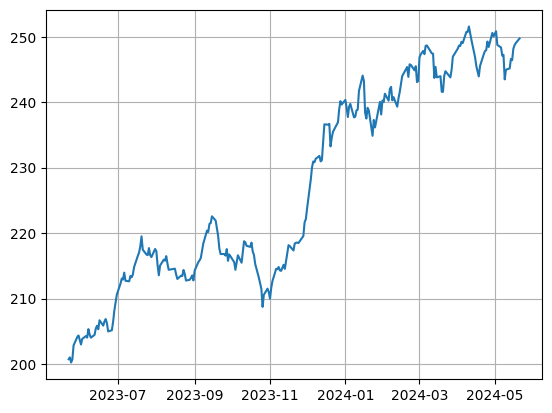

In [10]:
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['Close Price'],label='Close Price')
plt.grid(True)
plt.show()

In [11]:
col=['Total Traded Quantity','Turnover ₹','No. of Trades','Deliverable Qty']
df[col]=df[col].apply(lambda x:x.str.replace(',','').astype('float'))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Symbol                  249 non-null    object        
 1   Series                  249 non-null    object        
 2   Date                    249 non-null    datetime64[ns]
 3   Prev Close              249 non-null    float64       
 4   Open Price              249 non-null    float64       
 5   High Price              249 non-null    float64       
 6   Low Price               249 non-null    float64       
 7   Last Price              249 non-null    float64       
 8   Close Price             249 non-null    float64       
 9   Average Price           249 non-null    float64       
 10  Total Traded Quantity   249 non-null    float64       
 11  Turnover ₹              249 non-null    float64       
 12  No. of Trades           249 non-null    float64   

<Axes: >

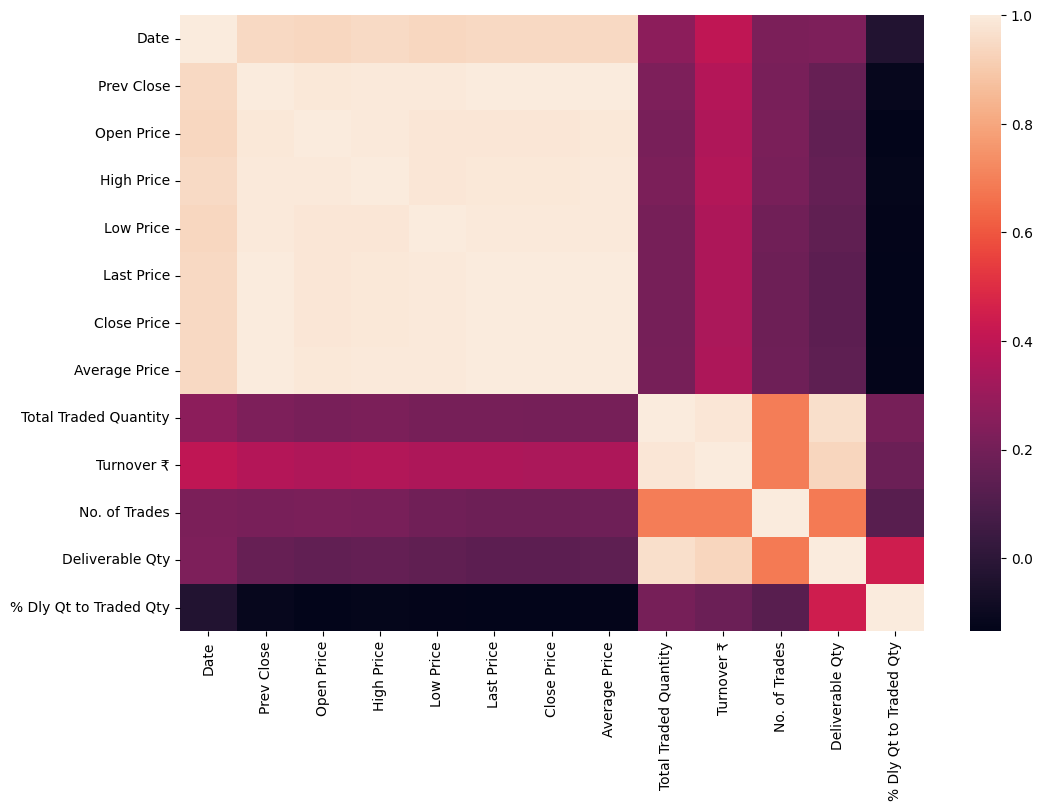

In [13]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(exclude='object').corr())

In [15]:
!pip install statsmodels

In [18]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Close Price'],autolag='AIC')

In [19]:
result

(-0.9461054702870949,
 0.77241047479083,
 0,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 816.4536271926806)